Examining and Visualizing NMR Kinetics Data
=============================

<strong>Author(s):</strong> Seth D. Veenbaas, Jessica A. Nash, The Molecular Sciences Software Institute

<div class="alert alert-block alert-info"> 
<h2>Overview</h2>

<strong>Questions:</strong>

* How can I use pandas to process data?

* How can I visualize relationships between different parts of my data?

<strong>Objectives:</strong>

* Use pandas and scipy to load and analyze NMR kinetics data

* Determine the reaction order and rate constant (k) from NMR reaction monitoring data

</div>

# NMR kinetics: S<sub>N</sub>2

The SN2 reaction between 1-bromobutane (BuBr) and iodide ion (I–) proceeds via a single-step bimolecular mechanism.

Using NMR spectroscopy, the reaction's progress can be monitored by observing the disappearance of the BuBr signal (δ3.5) and the appearance of the BuI signal (δ3.3).

| Reagents | Concentration |
| :------: | :-----------: |
|   BuBr   |     0.6 M     |
|   NaI    |     0.6 M     |


![reaction](images/BuBr_reaction_scheme.jpeg)


Source: [NMR Kinetics of the SN2 Reaction between BuBr and I–: An Introductory Organic Chemistry Laboratory Exercise](https://pubs.acs.org/doi/10.1021/ed500371h)


Let's dive into the data and compute the rate constant!

## Import packages/libraries

In [14]:
from rdkit import Chem
from rdkit.Chem import Draw, AllChem

### Draw a reaction using RDKit

`rdkit.AllChem.ReactionFromSmarts()` can draw reactions from SMILES strings formatted using these rules:
- Separate molecules using: `.`
- Separate reactants from products using arrows: `>>`
- (Optional) place solvent molecules between the arrows: `>solvent1.solvent2>`

Examples:
```python
'reactant1.reactant2>>product1.product2'
or
'reactant1.reactant2>solvent1.solvent2>product1.product2'
```

Let's draw a substitution reaction!

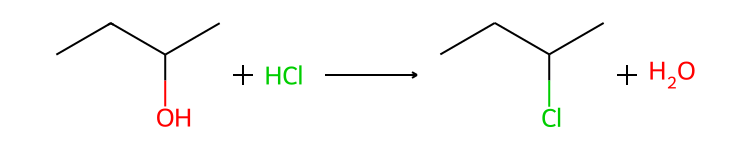

In [15]:
reaction_smiles = 'CCC(O)C.Cl>>CCC(Cl)C.O'
AllChem.ReactionFromSmarts(reaction_smiles, useSmiles=True)

<div class="alert alert-block alert-warning">
<h3>Challange</h3>

Draw the S<sub>N</sub>2 reaction for butyl bromide `CCCCBr` and iodide `[I-]` in acetone `CC(=O)C`.
* **Reactants**: `CCCCBr` and `[I-]`
* **Solvent**: `CC(=O)C`
* **Products**: `CCCCI` and `[Br-]`

**Tip**: In SMILES strings ions are drawn inside `[]` (eg. `[Na+]`, `[I-]`)

</div>

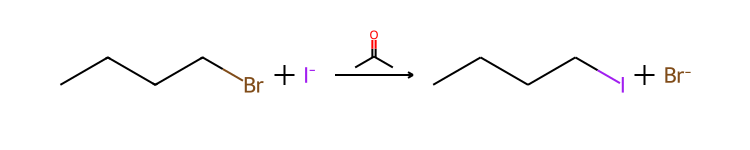

In [16]:
reaction_smiles = 'CCCCBr.[I-]>CC(=O)C>CCCCI.[Br-]'
AllChem.ReactionFromSmarts(reaction_smiles, useSmiles=True)

# Visualizing protons and chemical shifts

We can monitor the progress of our reaction via NMR because the reactant and product have unique chemical shifts. 

Let's visualize which protons we will be integrating to monitor our reaction!

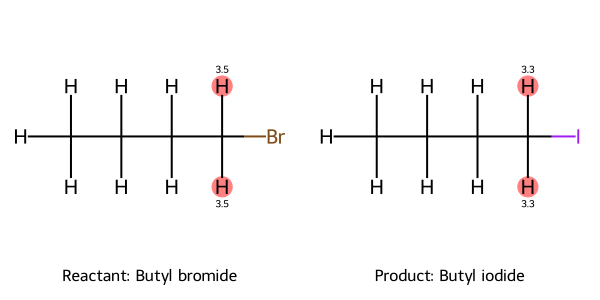

In [17]:
# Define the molecules
butyl_bromide = Chem.MolFromSmiles("CCCCBr")
butyl_iodide = Chem.MolFromSmiles("CCCCI")

# Add explicit hydrogens
butyl_bromide = Chem.AddHs(butyl_bromide)
butyl_iodide = Chem.AddHs(butyl_iodide)

# Annotate chemical shifts into unique protons
butyl_bromide.GetAtomWithIdx(12).SetProp('atomNote', '3.5')
butyl_bromide.GetAtomWithIdx(13).SetProp('atomNote', '3.5')
butyl_iodide.GetAtomWithIdx(12).SetProp('atomNote', '3.3')
butyl_iodide.GetAtomWithIdx(13).SetProp('atomNote', '3.3')

# Create a combined image
Draw.MolsToGridImage(
    [butyl_bromide, butyl_iodide],
    legends=['Reactant: Butyl bromide', 'Product: Butyl iodide'],
    highlightAtomLists=[[12, 13], [12, 13]],
    molsPerRow=2,
    subImgSize=(300, 300),
)

## Pandas: Data manipulation and analysis

[Pandas](https://pandas.pydata.org/) is very powerful Python library used for data analysis and manipulation. Pandas is ubiquitous in the world of data science and today we will use it to examine and analyze data from a photo NMR experiment.

For more information on pandas, refer to the [pandas documentation](https://pandas.pydata.org/docs/) or the [10 minutes to pandas guide](https://pandas.pydata.org/docs/user_guide/10min.html).

### Dataframe

The central data structure of pandas is a `pandas.DataFrame`.

You can think of a Dataframe as an Excel spreadsheet that contains data in columns and rows.

|           | index | column_1 | column_2 | ... |
| :-------: | :---: | :------: | :------: | :-: |
| **row_1** |   0   |   data   |   data   | ... |
| **row_2** |   1   |   data   |   data   | ... |
| **row_3** |   2   |   data   |   data   | ... |
|    ...    |  ...  |   ...    |   ...    | ... |

## Import packages/libraries

Let's import `pandas`, `numpy`, and the plotting package `matplotlib` using their standard abbreviations `pd`, `np`, and `plt`.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading a CSV File

[Pandas](https://pandas.pydata.org/) makes it simple to read and work with datasets in spreadsheets (CSV or Excel formats).  
- read CSV files: `pd.read_csv()`
- read Excel files: `pd.read_excel()`

Let's create a Dataframe using our NMR kinetics data.

In [19]:
kinetics_data = pd.read_csv('data/kinetics_data_condition3.csv')

## Examining Data with `.head()` and `.tail()`

You can see a preview of your Dataframe using the `.head()` or `.tail()` method. By default `.head()` or `.tail()` display the first or last 5 rows of the Dataframe. You can display more rows by passing an `int` as an argument to either method.

Let's look at the first 10 rows of our `kinetics_data` DataFrame.

In [20]:
kinetics_data.head(10)

,Timepoint,Integration_3.5_ppm,Integration_3.3_ppm
0,1,16591300000,1850710000
1,2,16816100000,2118990000
2,3,15617800000,2828960000
3,4,14513500000,3507860000
4,5,13819000000,4019790000
5,6,13263100000,4462330000
6,7,12892100000,4802640000
7,8,12476000000,5104320000
8,9,12095700000,5287240000
9,10,11728300000,5430190000


<div class="alert alert-block alert-warning">
<h3>Challange</h3>

Use the `tail()` method to display the last 8 rows of our `kinetics_data` DataFrame.

</div>

In [21]:
kinetics_data.tail(8)

,Timepoint,Integration_3.5_ppm,Integration_3.3_ppm
52,53,5799200000,11437600000
53,54,5761140000,11487500000
54,55,5731440000,11508000000
55,56,5682460000,11549200000
56,57,5663930000,11573900000
57,58,5619960000,11609200000
58,59,5587810000,11641900000
59,60,5548890000,11682000000


## Getitem (`[]`): selecting data in a DataFrame

You can index data in a DataFrame by column or row. This process looks similar to indexing or slicing a list. 

### Index a list

```python
first_value = list[0]
or
first_five_values = list[0:5]
```

### Getitem in a DataFrame

```python
column = DataFrame['column_name']
or
first_five_rows = DataFrame[0:5]
```
<br>

Let's see how we access data in the `Integration_3.5_ppm` column.

In [22]:
kinetics_data['Integration_3.5_ppm']

0     16591300000
1     16816100000
2     15617800000
3     14513500000
4     13819000000
5     13263100000
6     12892100000
7     12476000000
8     12095700000
9     11728300000
10    11465800000
11    11315500000
12    11045900000
13    10808900000
14    10480900000
15    10181500000
16     9918420000
17     9643220000
18     9432790000
19     9194070000
20     8971060000
21     8781150000
22     8597770000
23     8414760000
24     8247250000
25     8079540000
26     7921860000
27     7788600000
28     7647310000
29     7512990000
30     7405860000
31     7299280000
32     7191940000
33     7096840000
34     6995360000
35     6898390000
36     6807320000
37     6724690000
38     6629830000
39     6567130000
40     6487630000
41     6388700000
42     6318880000
43     6258190000
44     6198780000
45     6146410000
46     6091320000
47     6038290000
48     5980180000
49     5929910000
50     5882500000
51     5845120000
52     5799200000
53     5761140000
54     5731440000
55     568

`kinetics_data['Integration_3.5_ppm']` displays every value in the `Integration_3.5_ppm` column.

In Excel this operation would look something like this:

![Excel_access_column](images/excel_access_column.png)


Let's see how we access data in the  5<sup>th</sup> row.

In [23]:
kinetics_data[4:5]

,Timepoint,Integration_3.5_ppm,Integration_3.3_ppm
4,5,13819000000,4019790000


`kinetics_data[4:5]` displays every value in the 5<sup>th</sup> row.

In Excel this operation would look something like this:

![Excel_access_column](images/excel_access_row.png)

## Setting a new column

You can create a new column in a DataFrame by performing mathematical operations (`+`, `-`, `*`, `/`, ect.) on an existing column. This is the equivalent of using a function for perform an operation in Excel.

### Syntax

```python
DataFrame_name['Grams'] = DataFrame_name['Kilograms'] / 1000
```

<br>

A time point was taken every 30 seconds in our reaction monitoring data.

Let's convert our `kinetics_data['Timepoint']` column into seconds and save the results to new column called `kinetics_data['Time(s)']`!

In [24]:
kinetics_data['Time(s)'] = kinetics_data['Timepoint'] * 30
kinetics_data.head()

,Timepoint,Integration_3.5_ppm,Integration_3.3_ppm,Time(s)
0,1,16591300000,1850710000,30
1,2,16816100000,2118990000,60
2,3,15617800000,2828960000,90
3,4,14513500000,3507860000,120
4,5,13819000000,4019790000,150


In Excel this operation would look something like this:

![excel_formula](images/excel_formula.png)

We need to create several new columns in our `kinetics_data` DataFrame to help us determine the reaction rate constant (k):
- `kinetics_data['Normalized_BuBr]` : Mol fraction of butylbromide.
- `kinetics_data['Normalized_BuI]` : Mol fraction of butyliodide.
- `kinetics_data['[BuBr]']` : Concentration of butylbromide (M).
- `kinetics_data['[BuI]']` : Concentration of butyliodide (M).
- `kinetics_data['ln[BuBr]']` : Natural log of the concentration of butylbromide (M).
- `kinetics_data['1/[BuBr]']` : Inversion concentration of butylbromide (M<sup>-1</sup>).

Let's create these new columns now!

In [25]:
kinetics_data['Normalized_BuBr'] = kinetics_data['Integration_3.5_ppm'] / (kinetics_data['Integration_3.5_ppm'] + kinetics_data['Integration_3.3_ppm'])
kinetics_data['Normalized_BuI'] = kinetics_data['Integration_3.3_ppm'] / (kinetics_data['Integration_3.5_ppm'] + kinetics_data['Integration_3.3_ppm'])
kinetics_data['[BuBr]'] = kinetics_data['Normalized_BuBr'] * 0.6
kinetics_data['[BuI]'] = kinetics_data['Normalized_BuI'] * 0.6
kinetics_data['ln[BuBr]'] = np.log(kinetics_data['[BuBr]'])

<div class="alert alert-block alert-warning">
<h3>Challange</h3>

Create new column `kinetics_data['1/[BuBr]']` (M<sup>-1</sup>) by taking the inverse of `kinetics_data['[BuBr]']` (M).

</div>

In [26]:
kinetics_data['1/[BuBr]'] = 1 / kinetics_data['[BuBr]']

## Examining Data Part 2

[Pandas](https://pandas.pydata.org/) has additional useful methods for quickly examining and summarizing date.

- [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) : Provides a summary of the DataFrame, including data types and non-null counts.
- [`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) : Generates descriptive statistics for numeric columns.

Now that we have more data in our DataFrame, let's use the `describe()` method to examine how our DataFrame has changed:

In [27]:
kinetics_data.describe()

,Timepoint,Integration_3.5_ppm,Integration_3.3_ppm,Time(s),Normalized_BuBr,Normalized_BuI,[BuBr],[BuI],ln[BuBr],1/[BuBr]
count,60.000000,6.000000e+01,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,30.500000,8.563993e+09,8.897774e+09,915.000000,0.488243,0.511757,0.292946,0.307054,-1.275690,3.736210
std,17.464249,2.996777e+09,2.749852e+09,523.927476,0.161350,0.161350,0.096810,0.096810,0.304013,1.027620
min,1.000000,5.548890e+09,1.850710e+09,30.000000,0.322032,0.100353,0.193219,0.060212,-1.643931,1.852578
25%,15.750000,6.185688e+09,7.231048e+09,472.500000,0.358699,0.413501,0.215219,0.248101,-1.536105,2.842162
50%,30.500000,7.459425e+09,9.992435e+09,915.000000,0.427429,0.572571,0.256457,0.343543,-1.360819,3.899486
75%,45.250000,1.025635e+10,1.105912e+10,1357.500000,0.586499,0.641301,0.351899,0.384781,-1.044488,4.646499
max,60.000000,1.681610e+10,1.168200e+10,1800.000000,0.899647,0.677968,0.539788,0.406781,-0.616578,5.175477


## Visualizing data with Pandas

[Pandas](https://pandas.pydata.org/) makes data visualization easy with its built-in `DataFrame.plot()` method that can make plots directly from a DataFrame object.

### Why plot with Pandas?

- **Ease of Use**: Quickly create line plots, bar charts, scatter plots, and more.
- **Built for DataFrames**: Automatically uses column names as labels and handles indexing seamlessly.


### [`DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

Make plots of a DataFrame.

#### Parameters

- **x** : `str` of column name, *(default: `None`)*

    The column to use for the x-axis (independent variable).

- **y** : `str` or `list` of column name(s), *(default: `None`)*

    The column(s) to use for the y-axis (dependent variable).

- **kind** : `str`, *(Default: `'line'`)*

    The kind of plot to produce (e.g., `'bar'`, `'hist'`, `'scatter'`)


<br>

Let's plot our reaction over time!

<Axes: xlabel='Time(s)'>

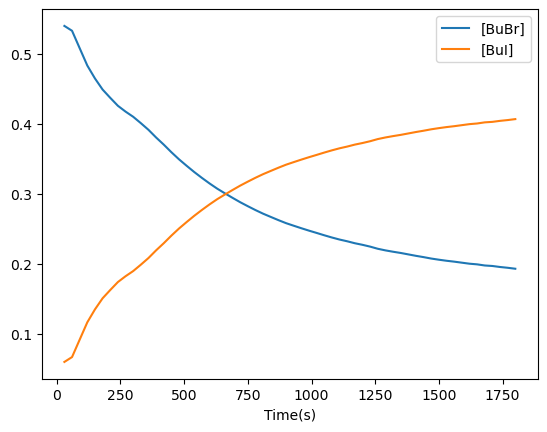

In [28]:
kinetics_data.plot(x='Time(s)', y=['[BuBr]', '[BuI]'])

## Introduction to Matplotlib

[Matplotlib](https://matplotlib.org/stable/) is a popular Python library used for creating static, interactive, and animated visualizations. It is especially useful in scientific computing for generating publication-quality graphs and plots. Matplotlib works seamlessly with NumPy, pandas, and other data-handling libraries, making it an excellent choice for visualizing chemical data.


### Why plot with Matplotlib?

- **Versatility:** Supports various types of plots like scatter, line, bar, and histogram.
- **Customization:** You can control every aspect of the figure, such as colors, labels, and markers.

Let’s replot our reaction progress over tim using matplotlib!


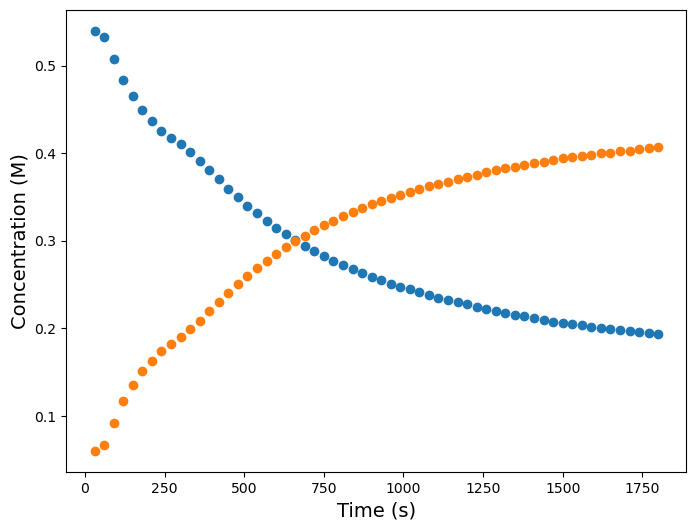

In [29]:
# Create a blank figure
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot [BuBr] as a scatter plot
plt.scatter(
    x=kinetics_data['Time(s)'],
    y=kinetics_data['[BuBr]'],
    label='[BuBr]'
)

# Plot [BuI] as a scatter plot
plt.scatter(
    x=kinetics_data['Time(s)'],
    y=kinetics_data['[BuI]'],
    label='[BuI]'
)

# Add labels, title, and legend
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Concentration (M)', fontsize=14)

# Show the plot
plt.show()


## Customize scatter plots with Matplotlib

[Matplotlib](https://matplotlib.org/stable/) offers tons of customization. Here is a summary of some of the methods and arguments we can use to modify our scatter plot.

### [`plt.scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

A scatter plot of y vs. x with varying marker size and/or color.

#### Parameters

- **s** : `float`, *(default: `20`)*

    The size of the markers.

- **color** : `str` of [color](https://matplotlib.org/stable/users/explain/colors/colors.html#colors-def), *(default: `None`)*

    The marker colors (e.g., `'red'`, `'blue'`, `'green'`, `'yellow'`).

- **marker** : `str` of [marker style](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers), *(default: `'o'`)*

    The style of the markers (e.g., `'o'`, `'v'`, `'s'`, `'*'`).

- **edgecolors** : `str` of [color](https://matplotlib.org/stable/users/explain/colors/colors.html#colors-def), *(default: `'face'`)*

    The edge color of the markers. Use `'face'` to match the face color or `'none'` for no edge.

- **alpha** : `float`, *(default: `None`)*

    The alpha blending value for markers, between 0 (transparent) and 1 (opaque).

- **label** : `str`, *(default: `None`)*

    A label for the legend.


### [`plt.title()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html)

Set a title for the plot.

#### Parameters

- **label** : `str`, *(default: `None`)*

    The title text to display at the top of the plot.


- **loc** : `str`, one of `'center'`, `'left'`, or `'right'`, *(default: `'center'`)*

    The alignment of the title relative to the plot.


### [`plt.legend()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)

Place a legend on the Axes.

#### Parameters

- **loc** : `str`, *(default: `'best'`)*

    The location of the legend (e.g., `'upper right'`, `'center'`, or `'best'`).

- **title** : `str`, *(default: `None`)*

    The title of the legend box.

- **fontsize** : `int` or `str`, *(default: `None`)*

    The size of the legend text.


### [`plt.grid()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html)

Configure the grid lines.

#### Parameters

- **visible** : `bool`, *(default: `None`)*
  
    Whether to show (`True`) or hide (`False`) the grid.

- **color** : `str` of [color](https://matplotlib.org/stable/users/explain/colors/colors.html#colors-def), *(default: `None`)*

    The color of the grid lines.

- **linestyle** : `str` of [line style](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html), *(default: `None`)*

    The style of the grid lines (e.g., `'solid'`, `'dotted'`, or `'dashed'`).


### [`plt.xlim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html)

Set the x limits of the current Axes.

#### Parameters

- **left** : `float` or `None`, *(default: `None`)*

    The lower limit of the x-axis.

- **right** : `float` or `None`, *(default: `None`)*

    The upper limit of the x-axis.
    

### [`plt.ylim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html)

Set the y limits of the current Axes.

#### Parameters

- **bottom** : `float` or `None`, *(default: `None`)*

    The lower limit of the y-axis.

- **top** : `float` or `None`, *(default: `None`)*

    The upper limit of the y-axis.

<div class="alert alert-block alert-warning">
<h3>Challange</h3>

Use the documentation summary above to customize your own scatter plot.

Make a few modification to the code below and run the cell to view your new scatter plot.

</div>

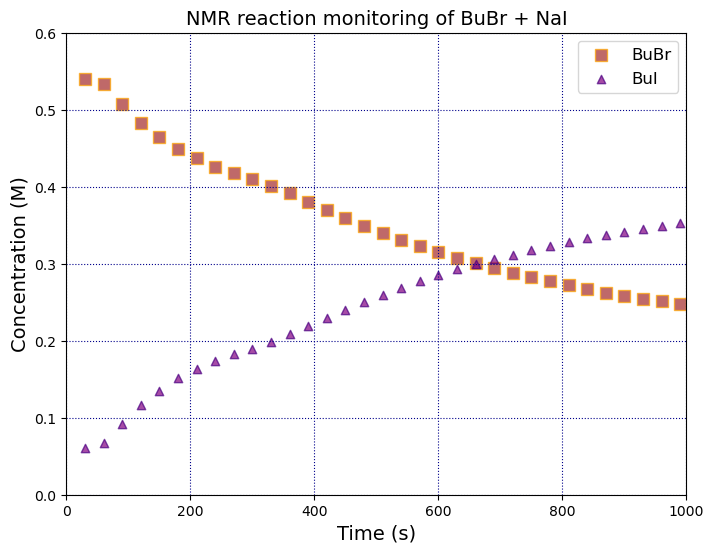

In [30]:
# Create a blank figure
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot [BuBr] as a scatter plot
plt.scatter(
    x=kinetics_data['Time(s)'],
    y=kinetics_data['[BuBr]'],
    s=75,
    color='brown',
    marker='s',
    alpha=0.7,
    edgecolor='orange',
    label='BuBr',
)

# Plot [BuI] as a scatter plot
plt.scatter(
    x=kinetics_data['Time(s)'],
    y=kinetics_data['[BuI]'],
    color='purple',
    edgecolor='indigo',
    marker='^',
    label='BuI',
    alpha=0.7,
)

# Add labels, title, and legend
plt.xlim(left=0, right=1000)
plt.ylim(top=0.6, bottom=0)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Concentration (M)', fontsize=14)
plt.title('NMR reaction monitoring of BuBr + NaI', fontsize=14)
plt.legend(fontsize=12)

# Show the plot
plt.grid(visible=True, color='darkblue', linestyle='dotted')  # Add a grid for better readability
plt.show()

## Determining Reaction Order and Rate Constant

We can determine the reaction order and rate constant (k) of our reaction by analyzing the data and constructing specific plots.

### Reaction order

The reaction order is determined by finding which plot gives the best linear regression.

- **First-order**: Plot ln[reactant] vs. time.
- **Second-order**: Plot 1/[reactant] vs. time.

### Rate constant

The rate constant (k) can be determined from the slope of the linear regression.

- **First-order**: slope = -k
- **Second-order**: slope = k

### Summary

|                     |               First-order                |              Second-order               |
| :------------------ | :--------------------------------------: | :-------------------------------------: |
| **Rate Law**        |        $$ Rate = k [reactant] $$         |       $$  Rate = k [reactant]² $$       |
| **Integrated Form** | $$ ln[reactant] = -kt + ln[reactant₀] $$ | $$ 1/[reactant] = kt + 1/[reactant₀] $$ |
| **Linear Plot**     |    ln[reactant] vs. time (slope = -k)    |    1/[reactant] vs. time (slope = k)    |

<br>

Let's use Matplotlib to create the first-order plot (ln[reactant] vs. time) and [linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) from the [scipy](https://scipy.org/) library to perform a linear regression.


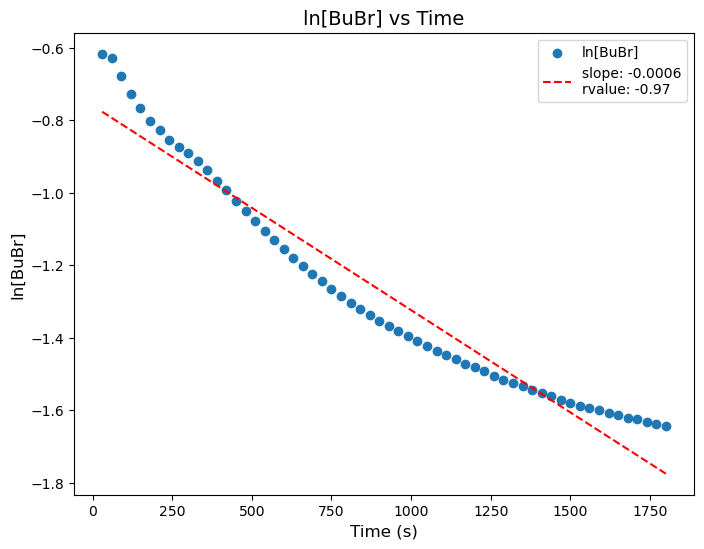

In [31]:
# Import linregress method
from scipy.stats import linregress

# Create a blank figure
plt.figure(figsize=(8, 6))

# Plot ln([BuBr]) vs Time
plt.scatter(
    x=kinetics_data['Time(s)'],
    y=kinetics_data['ln[BuBr]'],
    label="ln[BuBr]",
)

# Use scipy to perform linear regression
slope, intercept, rvalue, _, _ = linregress(
                                    kinetics_data['Time(s)'],
                                    kinetics_data['ln[BuBr]']
)

# Add linear regression line (line = kt + ln[reactant₀])
regression_line = slope * kinetics_data['Time(s)'] + intercept

# Plot the linear regression line
plt.plot(
    kinetics_data['Time(s)'],
    regression_line,
    label=f"slope: {slope:.4f}\nrvalue: {rvalue:.2f}",
    color='red',
    linestyle='--'
)

# Add labels, title, and legend
plt.title("ln[BuBr] vs Time", fontsize=14)
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("ln[BuBr]", fontsize=12)
plt.legend()

# Show plot
plt.show()

<div class="alert alert-block alert-warning">
<h3>Challange</h3>

Use Matplotlib to create the second-order plot (1/[reactant] vs. time). 

- x: `kinetics_data['Time(s)']`
- y: `kinetics_data['1/[BuBr]']`

</div>

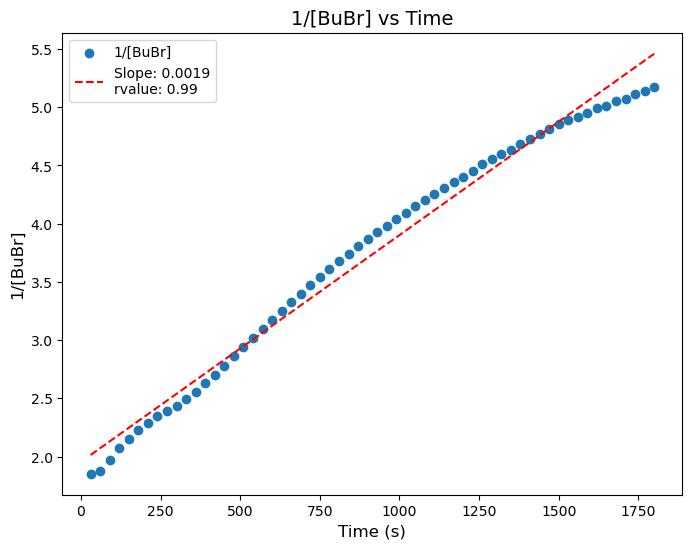

In [32]:
# Import linregress method
from scipy.stats import linregress

# Create a blank figure
plt.figure(figsize=(8, 6))

# Plot ln([BuBr]) vs Time
plt.scatter(
    x=kinetics_data['Time(s)'],
    y=kinetics_data['1/[BuBr]'],
    label="1/[BuBr]",
)

# Use scipy to perform linear regression
slope, intercept, rvalue, _, _ = linregress(
                                    kinetics_data['Time(s)'],
                                    kinetics_data['1/[BuBr]']
)

# Add linear regression line (line = kt + ln[reactant₀])
regression_line = slope * kinetics_data['Time(s)'] + intercept

# Plot the linear regression line
plt.plot(
    kinetics_data['Time(s)'],
    regression_line,
    label=f"Slope: {slope:.4f}\nrvalue: {rvalue:.2f}",
    color='red',
    linestyle='--'
)

# Add labels, title, and legend
plt.title("1/[BuBr] vs Time", fontsize=14)
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("1/[BuBr]", fontsize=12)
plt.legend()

# Show plot
plt.show()

<div class="alert alert-block alert-warning">
<h3>Challange</h3>

Use the plots and linear regressions to:

1) Determine the reaction order.
2) Determine the rate constant (k).

Write your answer in the Markdown cell below.

</div>

- Reaction order: 
- rate constant (k): 